In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime as dt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [2]:
userdf = pd.read_csv('/content/data/Indian Earthquakes List Update_Magnitudes (1).csv',encoding='ISO-8859-1',skiprows=10)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,5,7,9,10,11,12,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
userdf = userdf.rename(columns={"Unnamed: 0": "Searial No", "Unnamed: 1": "Year", "Unnamed: 2": "Month", "Unnamed: 3": "Day", "Unnamed: 12": "Latitude", "Unnamed: 13": "Longitude", "Unnamed: 14": "Depth", "Unnamed: 18": "Location","Unnamed: 19":"Reference"})

In [18]:
userdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52989 entries, 0 to 52988
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Searial No  52989 non-null  int64  
 1   Year        52989 non-null  int64  
 2   Month       52971 non-null  object 
 3   Day         52932 non-null  float64
 4   (UTC)       21186 non-null  object 
 5   (IST)       426 non-null    object 
 6   Mw          40935 non-null  float64
 7   Mw          50485 non-null  object 
 8   Mb          12283 non-null  object 
 9   Mb.1        50497 non-null  object 
 10  Ms          52823 non-null  object 
 11  ML          52823 non-null  object 
 12  Latitude    52989 non-null  object 
 13  Longitude   52989 non-null  object 
 14  Depth       50811 non-null  float64
 15  MM          41 non-null     object 
 16  MMI         0 non-null      float64
 17  MME         0 non-null      float64
 18  Location    9374 non-null   object 
 19  Reference   51407 non-nul

In [6]:
userdf.isna().sum()

Searial No        0
Year              0
Month            18
Day              57
(UTC)         31803
(IST)         52563
Mw            12054
Mw             2504
Mb            40706
Mb.1           2492
Ms              166
ML              166
Latitude          0
Longitude         0
Depth          2178
MM            52948
MMI           52989
MME           52989
Location      43615
Reference      1582
dtype: int64

In [7]:
def convertlonglat(s):
  s = str(s)
  s = s.upper()
  s = s.replace(' ','')
  s = s.replace('?','')
  s = s.replace('°','')
  s = s.replace(',','.')
  s = s.replace('E','')
  s = s.replace('N','')
  if 'W' in s:
    s = '-'+s
    s = s.replace('W','')
  if 'S' in s:
    s = '-'+s
    s = s.replace('S','')
  return float(s)

In [8]:
def convertfloat(s):
  return float(s)

In [9]:
def convertstring(s):
  return str(s)

In [10]:
def fillnan(s):
  if s == ' ':
    s = np.nan
  return s

In [11]:
cols = [0,4,5,6,8,9,10,11,15,16,17,18]
df = userdf.drop(userdf.columns[cols],axis=1)
df = df.drop(df[df.Mw.isnull()].index)
df = df.drop(df[df.Mw == '#VALUE!'].index)
df.dtypes

Year           int64
Month         object
Day          float64
Mw            object
Latitude      object
Longitude     object
Depth        float64
Reference     object
dtype: object

In [12]:
df['Month'] = df['Month'].apply(fillnan)
df['Day'].fillna(method='ffill',inplace= True)
df['Day'] = df['Day'].apply(convertstring)

df['Month'].fillna(method='ffill',inplace= True)
modeu2 = df['Month'].mode()[0]
modeu3 = df['Day'].mode()[0]
df['Month'] = df['Month'].apply(lambda x: modeu2 if x == '0' or x == '00' else x)
df['Day'] = df['Day'].apply(lambda x: modeu3 if x == '0.0' else x)
df['Depth'].fillna(df['Depth'].mean(),inplace=True)
df['Reference'].fillna('Unknown',inplace = True)
df['Latitude'] = df['Latitude'].apply(convertlonglat)
df['Longitude'] = df['Longitude'].apply(convertlonglat)
df['Month'] = df['Month'].apply(convertfloat)
df['Day'] = df['Day'].apply(convertfloat)
df['Mw'] = df['Mw'].apply(convertfloat)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50482 entries, 0 to 52988
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       50482 non-null  int64  
 1   Month      50482 non-null  float64
 2   Day        50482 non-null  float64
 3   Mw         50482 non-null  float64
 4   Latitude   50482 non-null  float64
 5   Longitude  50482 non-null  float64
 6   Depth      50482 non-null  float64
 7   Reference  50482 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 3.5+ MB


In [20]:
fp_list_knn = []
tp_list_knn = []
auc_list_knn = []

fp_list_dt = []
tp_list_dt = []
auc_list_dt = []

**Threshold = 4**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.8832326433594136

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.32      0.32       889
           1       0.93      0.94      0.94      9208

    accuracy                           0.88     10097
   macro avg       0.63      0.63      0.63     10097
weighted avg       0.88      0.88      0.88     10097



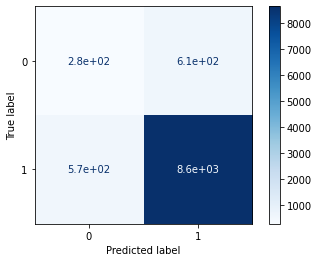

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

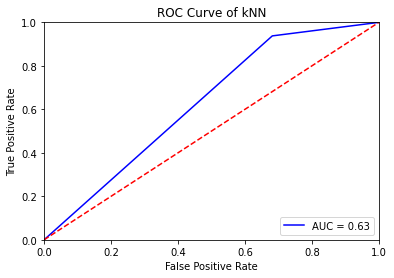

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.9067049618698624

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.30      0.36       889
           1       0.93      0.97      0.95      9208

    accuracy                           0.91     10097
   macro avg       0.69      0.63      0.65     10097
weighted avg       0.89      0.91      0.90     10097



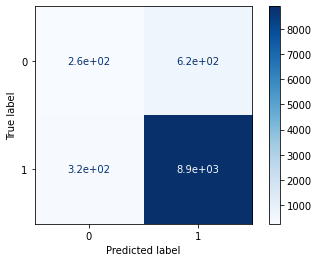

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

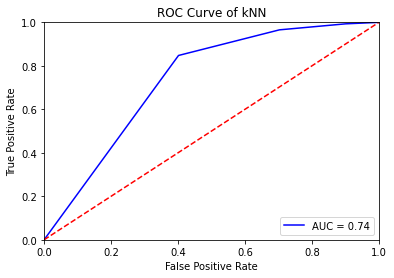

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.9134396355353075

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.28      0.36       889
           1       0.93      0.97      0.95      9208

    accuracy                           0.91     10097
   macro avg       0.72      0.63      0.66     10097
weighted avg       0.90      0.91      0.90     10097



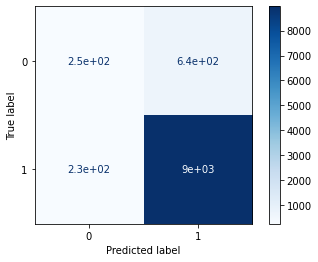

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

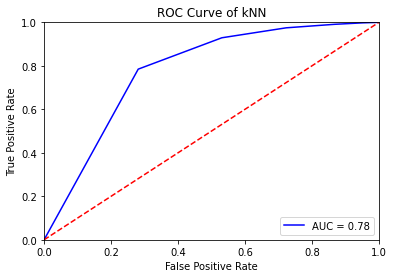

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

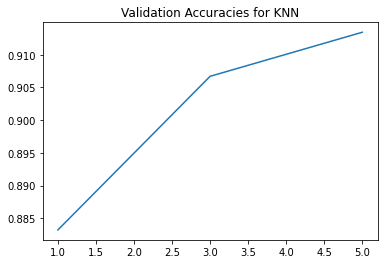

Best K Value :  5
Best Validation Accuracy :  0.9134396355353075


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.9157175398633257

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.18      0.27       889
           1       0.93      0.99      0.96      9208

    accuracy                           0.92     10097
   macro avg       0.75      0.58      0.61     10097
weighted avg       0.89      0.92      0.90     10097



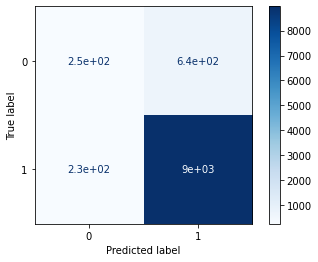

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

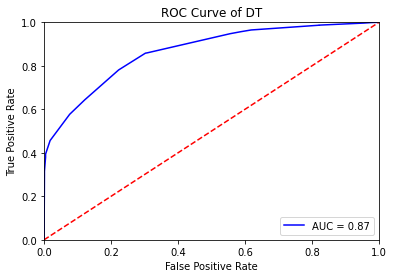

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.9174012082796871

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.26      0.36       889
           1       0.93      0.98      0.96      9208

    accuracy                           0.92     10097
   macro avg       0.75      0.62      0.66     10097
weighted avg       0.90      0.92      0.90     10097



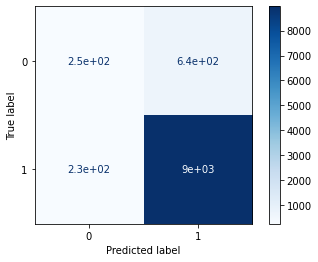

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

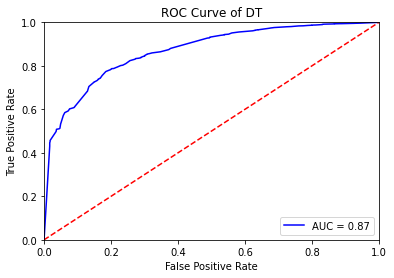

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.9074972764187382

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.31      0.37       889
           1       0.94      0.96      0.95      9208

    accuracy                           0.91     10097
   macro avg       0.70      0.64      0.66     10097
weighted avg       0.89      0.91      0.90     10097



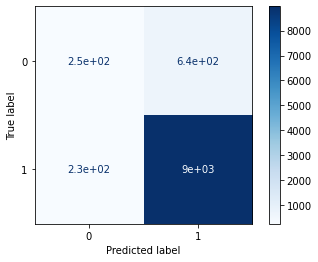

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

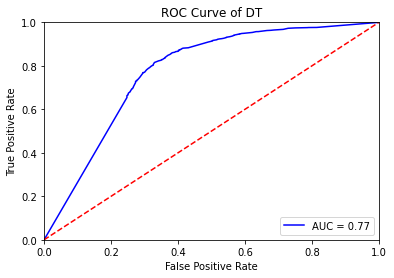

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

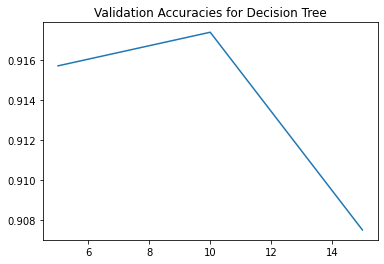

Best Depth :  10
Best Validation Accuracy :  0.9174012082796871


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

**Threshold** = **4.1**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.1 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.8615430325839358

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.25      0.35      1503
           1       0.88      0.97      0.92      8594

    accuracy                           0.86     10097
   macro avg       0.73      0.61      0.64     10097
weighted avg       0.84      0.86      0.84     10097



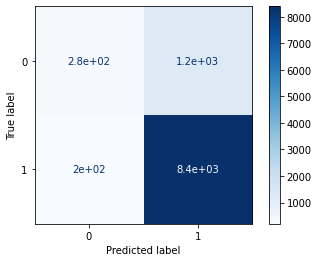

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

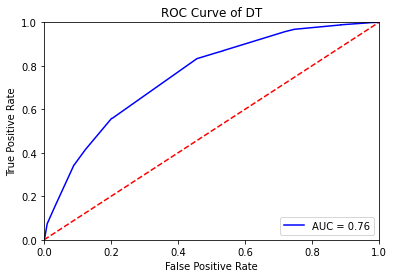

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.8633257403189066

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.23      0.34      1503
           1       0.88      0.97      0.92      8594

    accuracy                           0.86     10097
   macro avg       0.74      0.60      0.63     10097
weighted avg       0.84      0.86      0.84     10097



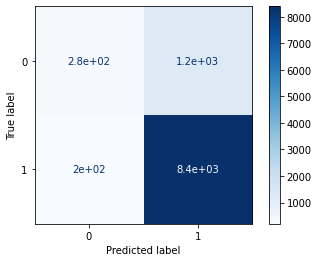

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

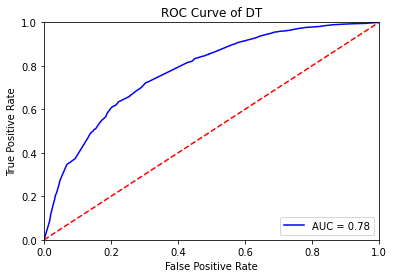

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.8433197979597901

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.27      0.34      1503
           1       0.88      0.94      0.91      8594

    accuracy                           0.84     10097
   macro avg       0.67      0.61      0.62     10097
weighted avg       0.82      0.84      0.83     10097



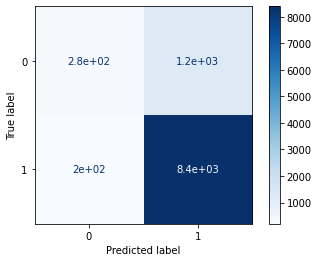

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

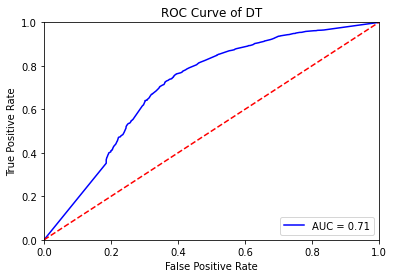

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

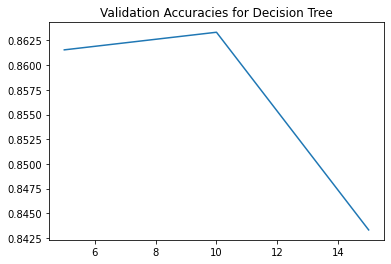

Best Depth :  10
Best Validation Accuracy :  0.8633257403189066


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.8027136773299

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.33      0.33      0.33      1503
           1       0.88      0.89      0.88      8594

    accuracy                           0.80     10097
   macro avg       0.61      0.61      0.61     10097
weighted avg       0.80      0.80      0.80     10097



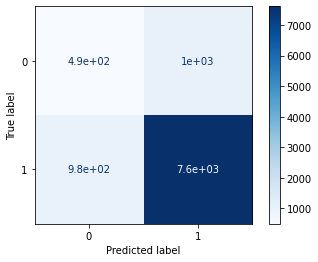

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

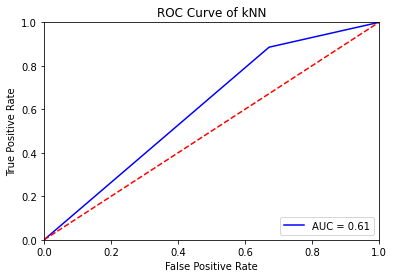

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.839259185896801

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.28      0.34      1503
           1       0.88      0.94      0.91      8594

    accuracy                           0.84     10097
   macro avg       0.66      0.61      0.63     10097
weighted avg       0.82      0.84      0.82     10097



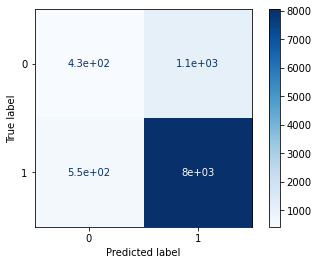

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

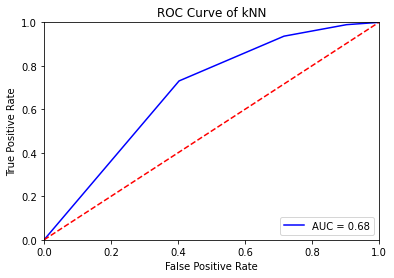

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.8515400614043775

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.26      0.35      1503
           1       0.88      0.95      0.92      8594

    accuracy                           0.85     10097
   macro avg       0.69      0.61      0.63     10097
weighted avg       0.82      0.85      0.83     10097



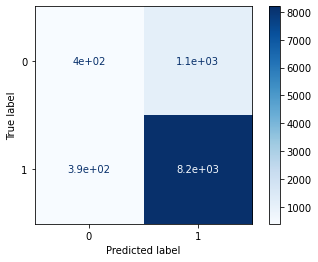

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

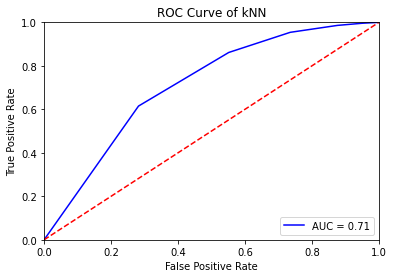

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

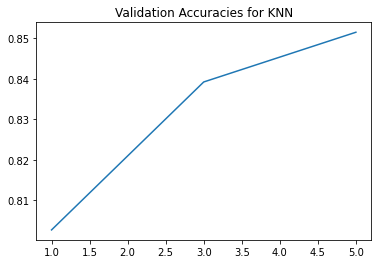

Best K Value :  5
Best Validation Accuracy :  0.8515400614043775


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 4.2**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.2 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.790531841140933

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.08      0.15      2186
           1       0.80      0.99      0.88      7911

    accuracy                           0.79     10097
   macro avg       0.71      0.53      0.51     10097
weighted avg       0.76      0.79      0.72     10097



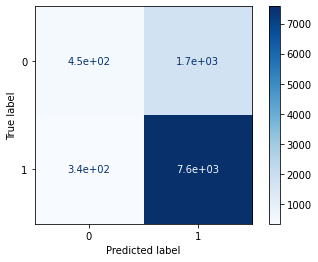

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

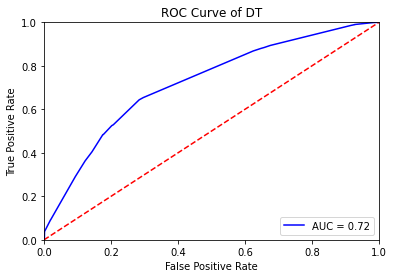

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7994453798157869

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.22      0.32      2186
           1       0.82      0.96      0.88      7911

    accuracy                           0.80     10097
   macro avg       0.71      0.59      0.60     10097
weighted avg       0.77      0.80      0.76     10097



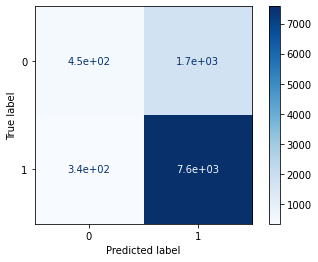

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

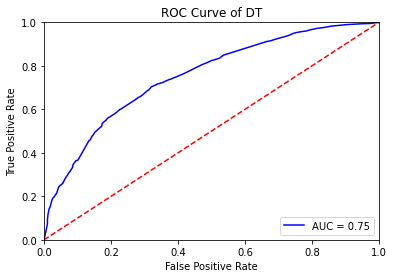

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7819154204219075

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.49      0.29      0.37      2186
           1       0.82      0.92      0.87      7911

    accuracy                           0.78     10097
   macro avg       0.66      0.60      0.62     10097
weighted avg       0.75      0.78      0.76     10097



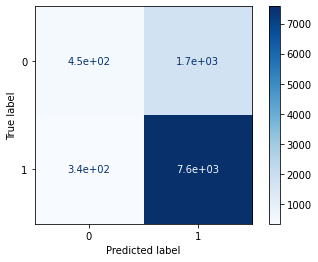

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

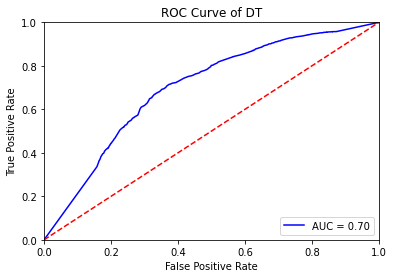

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

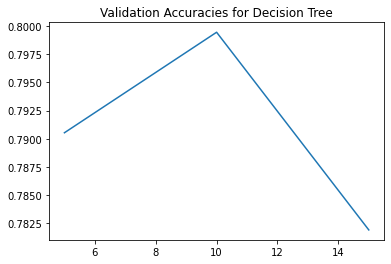

Best Depth :  10
Best Validation Accuracy :  0.7994453798157869


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7283351490541745

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.37      0.37      0.37      2186
           1       0.83      0.83      0.83      7911

    accuracy                           0.73     10097
   macro avg       0.60      0.60      0.60     10097
weighted avg       0.73      0.73      0.73     10097



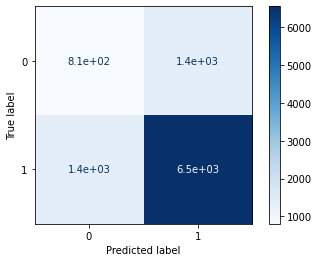

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

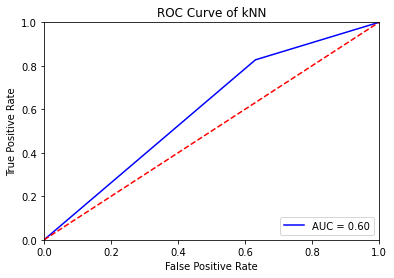

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7674556799049222

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.34      0.39      2186
           1       0.83      0.89      0.86      7911

    accuracy                           0.77     10097
   macro avg       0.64      0.61      0.62     10097
weighted avg       0.75      0.77      0.75     10097



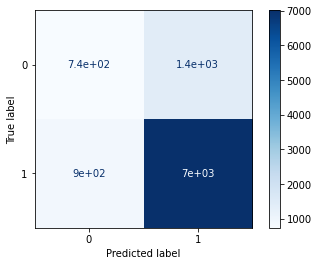

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

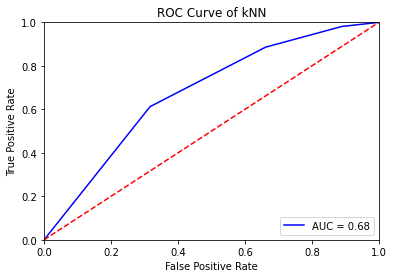

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7792413588194513

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.31      0.38      2186
           1       0.83      0.91      0.87      7911

    accuracy                           0.78     10097
   macro avg       0.66      0.61      0.62     10097
weighted avg       0.75      0.78      0.76     10097



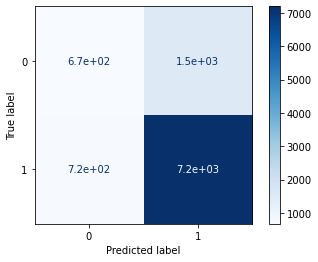

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

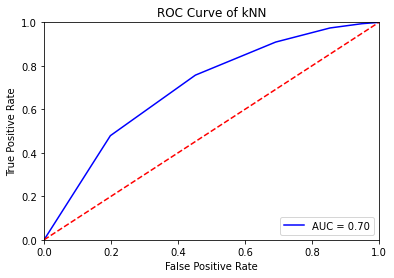

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

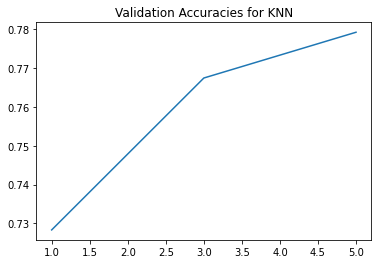

Best K Value :  5
Best Validation Accuracy :  0.7792413588194513


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 4.3**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.3 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7182331385560068

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.21      0.30      2952
           1       0.74      0.93      0.82      7145

    accuracy                           0.72     10097
   macro avg       0.64      0.57      0.56     10097
weighted avg       0.68      0.72      0.67     10097



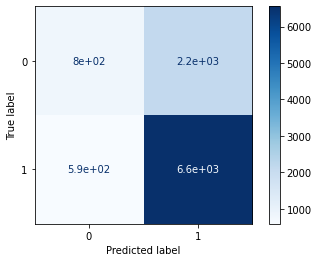

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

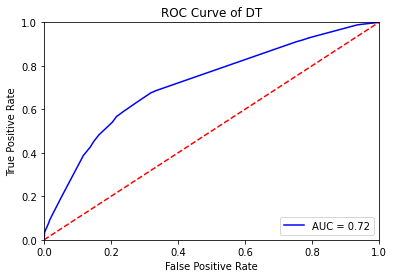

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7287313063286125

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.27      0.37      2952
           1       0.75      0.92      0.83      7145

    accuracy                           0.73     10097
   macro avg       0.66      0.59      0.60     10097
weighted avg       0.70      0.73      0.69     10097



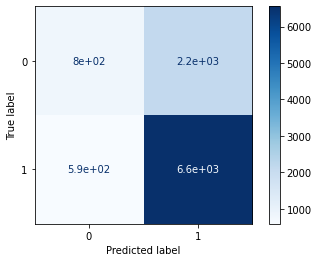

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

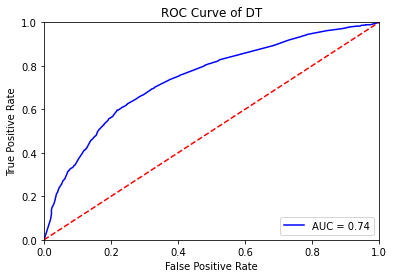

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7140734871744082

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46      2952
           1       0.78      0.83      0.80      7145

    accuracy                           0.71     10097
   macro avg       0.65      0.63      0.63     10097
weighted avg       0.70      0.71      0.71     10097



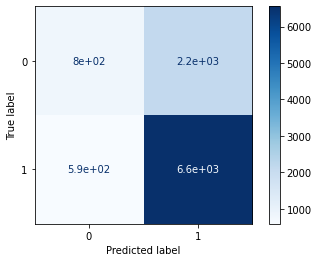

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

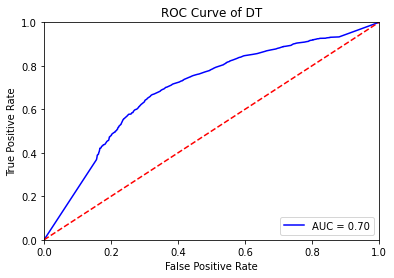

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

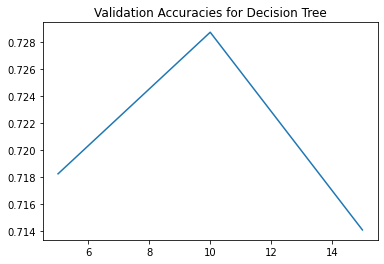

Best Depth :  10
Best Validation Accuracy :  0.7287313063286125


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6784193324749925

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.44      0.44      2952
           1       0.77      0.78      0.77      7145

    accuracy                           0.68     10097
   macro avg       0.61      0.61      0.61     10097
weighted avg       0.68      0.68      0.68     10097



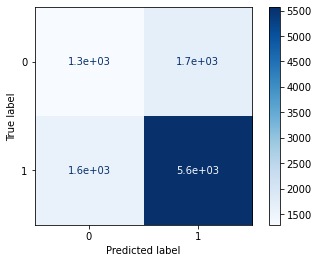

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

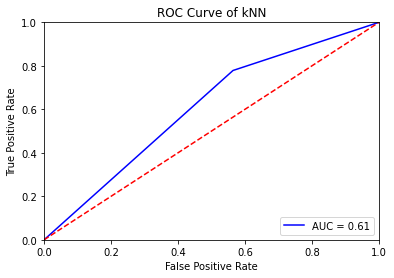

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7067445775973061

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.42      0.46      2952
           1       0.77      0.83      0.80      7145

    accuracy                           0.71     10097
   macro avg       0.64      0.62      0.63     10097
weighted avg       0.69      0.71      0.70     10097



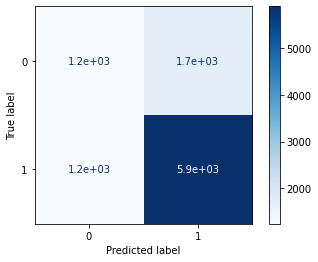

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

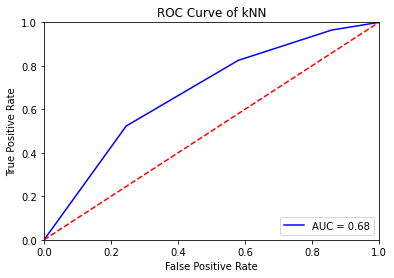

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.716450430821036

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      2952
           1       0.77      0.85      0.81      7145

    accuracy                           0.72     10097
   macro avg       0.65      0.62      0.63     10097
weighted avg       0.70      0.72      0.71     10097



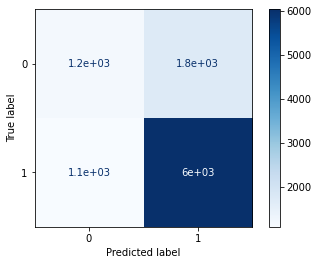

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

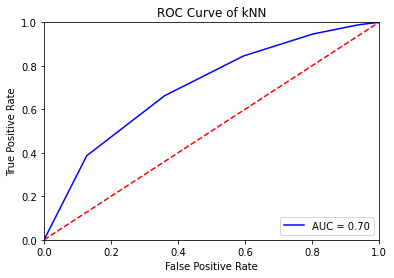

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

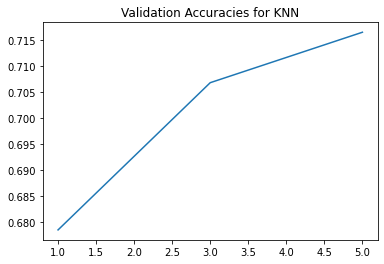

Best K Value :  5
Best Validation Accuracy :  0.716450430821036


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 4.4**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.4 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.6838664949985144

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.71      0.65      4120
           1       0.77      0.66      0.71      5977

    accuracy                           0.68     10097
   macro avg       0.68      0.69      0.68     10097
weighted avg       0.70      0.68      0.69     10097



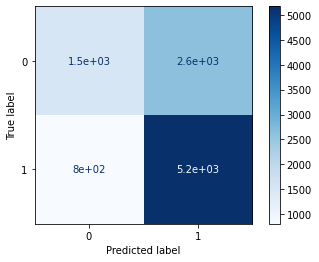

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

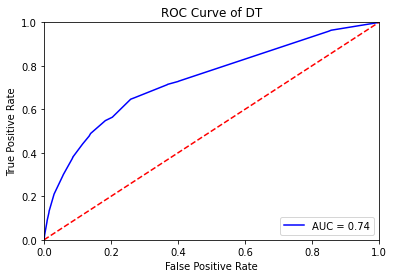

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7033772407645835

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.62      4120
           1       0.74      0.78      0.76      5977

    accuracy                           0.70     10097
   macro avg       0.69      0.69      0.69     10097
weighted avg       0.70      0.70      0.70     10097



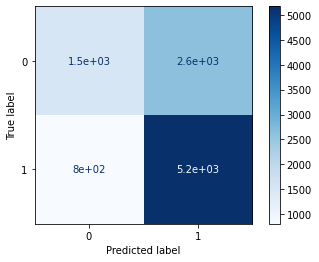

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

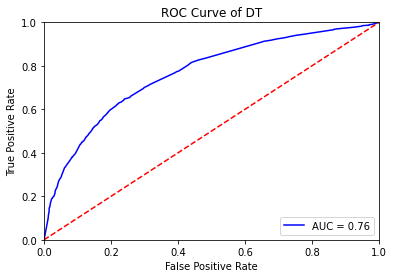

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.6883232643359414

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4120
           1       0.74      0.73      0.74      5977

    accuracy                           0.69     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.69      0.69      0.69     10097



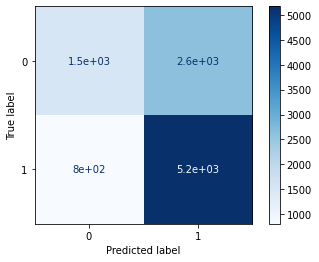

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

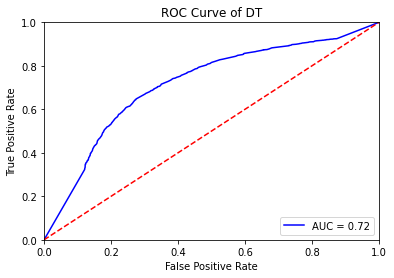

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

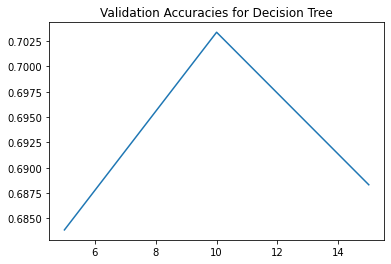

Best Depth :  10
Best Validation Accuracy :  0.7033772407645835


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6474200257502228

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.56      0.56      4120
           1       0.70      0.71      0.70      5977

    accuracy                           0.65     10097
   macro avg       0.63      0.63      0.63     10097
weighted avg       0.65      0.65      0.65     10097



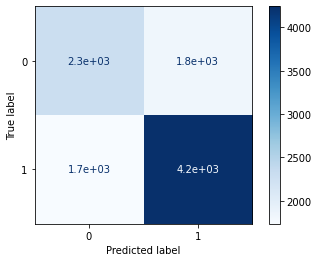

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

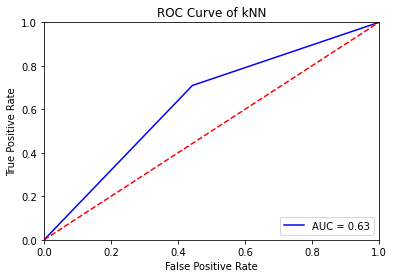

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.674655838367832

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.61      0.58      0.59      4120
           1       0.72      0.74      0.73      5977

    accuracy                           0.67     10097
   macro avg       0.66      0.66      0.66     10097
weighted avg       0.67      0.67      0.67     10097



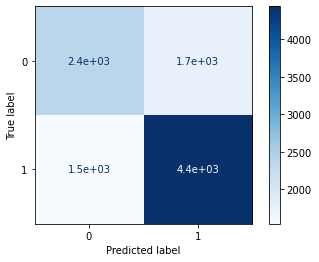

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

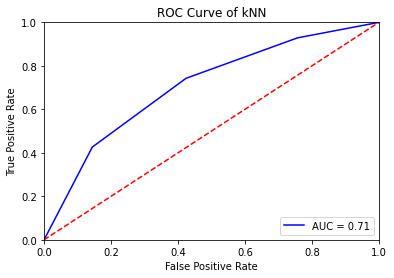

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6863424779637516

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.59      0.60      4120
           1       0.73      0.75      0.74      5977

    accuracy                           0.69     10097
   macro avg       0.67      0.67      0.67     10097
weighted avg       0.68      0.69      0.68     10097



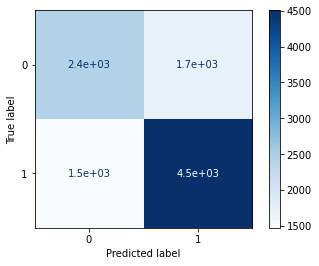

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

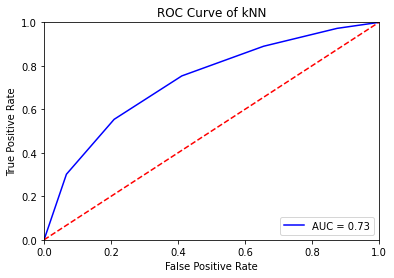

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

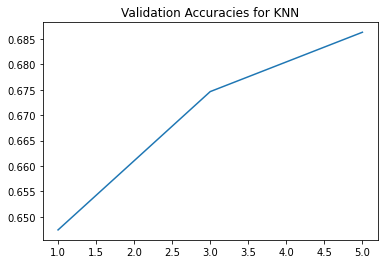

Best K Value :  5
Best Validation Accuracy :  0.6863424779637516


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 4.5**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.5 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.6825789838565911

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.80      0.71      4894
           1       0.75      0.58      0.65      5203

    accuracy                           0.68     10097
   macro avg       0.69      0.69      0.68     10097
weighted avg       0.70      0.68      0.68     10097



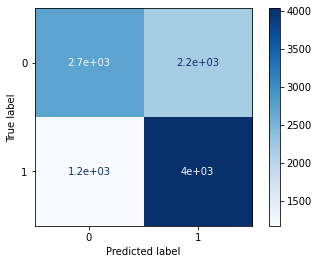

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

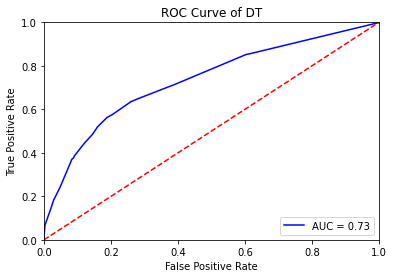

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7059522630484302

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.75      0.71      4894
           1       0.74      0.67      0.70      5203

    accuracy                           0.71     10097
   macro avg       0.71      0.71      0.71     10097
weighted avg       0.71      0.71      0.71     10097



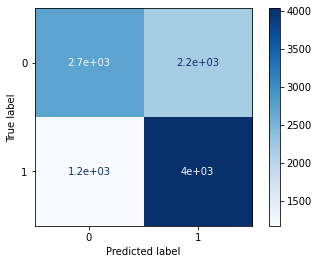

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

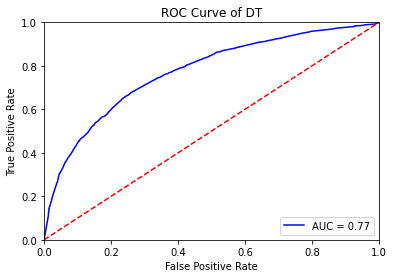

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.6845597702287808

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      4894
           1       0.70      0.67      0.69      5203

    accuracy                           0.68     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.69      0.68      0.68     10097



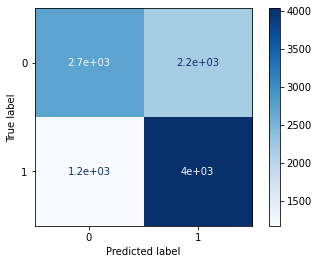

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

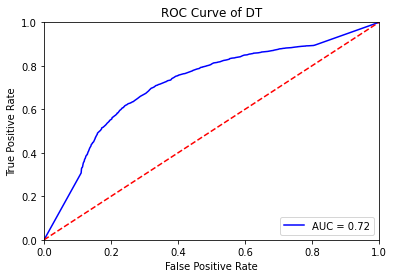

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

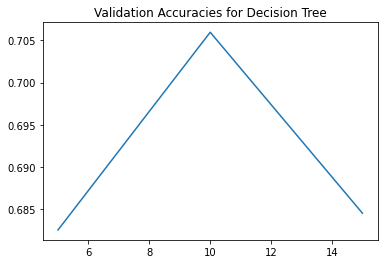

Best Depth :  10
Best Validation Accuracy :  0.7059522630484302


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6354362681984748

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      4894
           1       0.65      0.65      0.65      5203

    accuracy                           0.64     10097
   macro avg       0.64      0.64      0.64     10097
weighted avg       0.64      0.64      0.64     10097



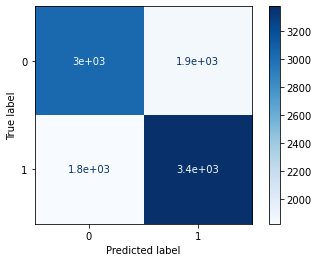

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

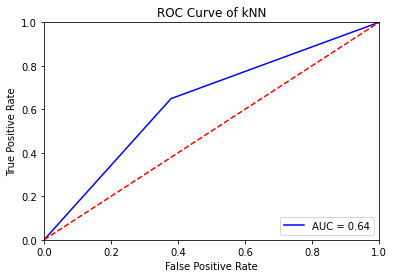

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6658413390115876

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      4894
           1       0.67      0.68      0.68      5203

    accuracy                           0.67     10097
   macro avg       0.67      0.67      0.67     10097
weighted avg       0.67      0.67      0.67     10097



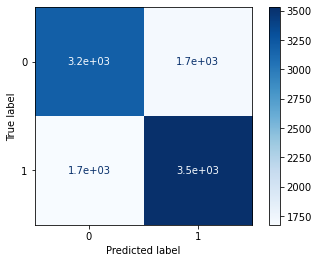

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

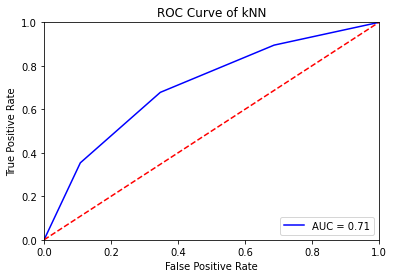

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6781222145191641

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.67      4894
           1       0.69      0.68      0.69      5203

    accuracy                           0.68     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.68      0.68      0.68     10097



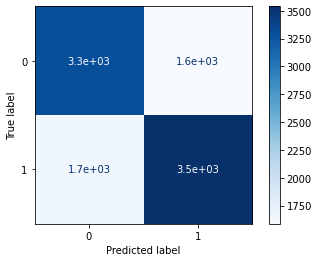

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

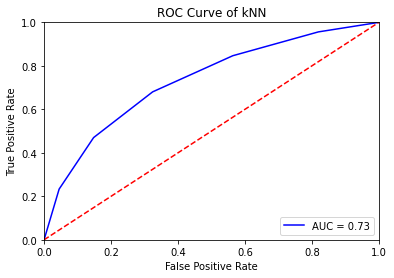

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

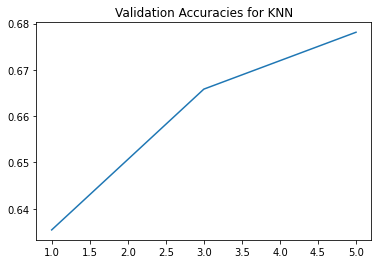

Best K Value :  5
Best Validation Accuracy :  0.6781222145191641


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 4.6**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.6 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.6973358423294048

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.85      0.76      5626
           1       0.73      0.51      0.60      4471

    accuracy                           0.70     10097
   macro avg       0.71      0.68      0.68     10097
weighted avg       0.70      0.70      0.69     10097



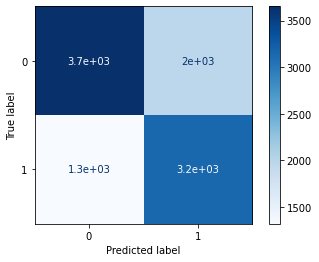

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

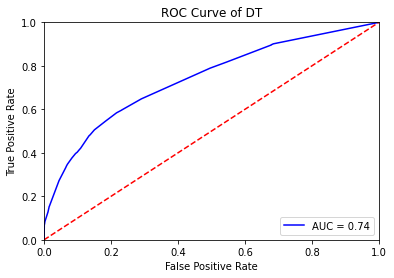

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7150638803605032

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      5626
           1       0.72      0.58      0.64      4471

    accuracy                           0.72     10097
   macro avg       0.72      0.70      0.70     10097
weighted avg       0.72      0.72      0.71     10097



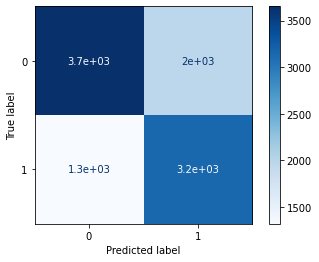

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

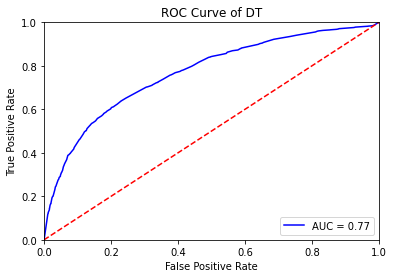

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.6883232643359414

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      5626
           1       0.67      0.59      0.63      4471

    accuracy                           0.69     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.69      0.69      0.69     10097



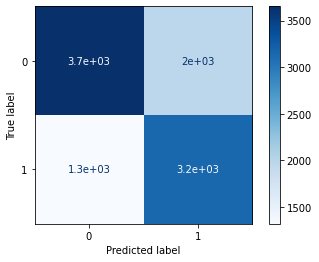

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

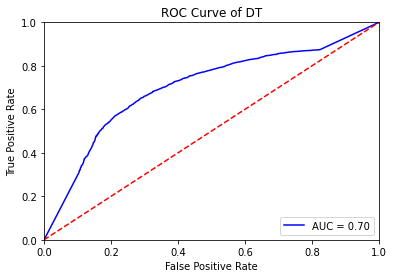

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

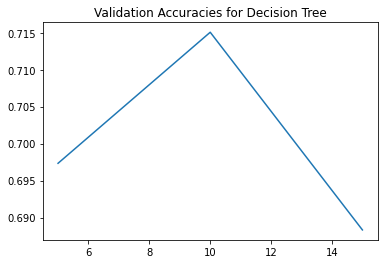

Best Depth :  10
Best Validation Accuracy :  0.7150638803605032


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6389026443498069

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.67      0.68      5626
           1       0.59      0.59      0.59      4471

    accuracy                           0.64     10097
   macro avg       0.63      0.63      0.63     10097
weighted avg       0.64      0.64      0.64     10097



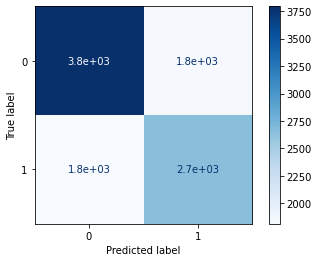

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

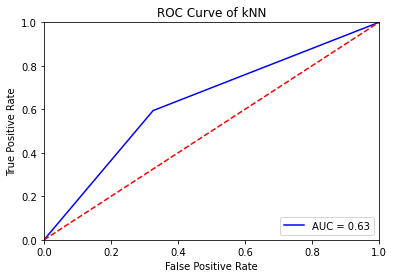

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6687134792512628

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      5626
           1       0.63      0.61      0.62      4471

    accuracy                           0.67     10097
   macro avg       0.66      0.66      0.66     10097
weighted avg       0.67      0.67      0.67     10097



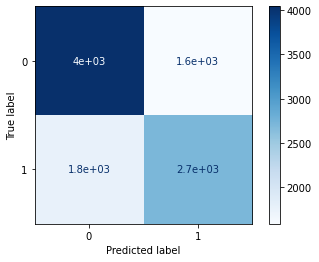

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

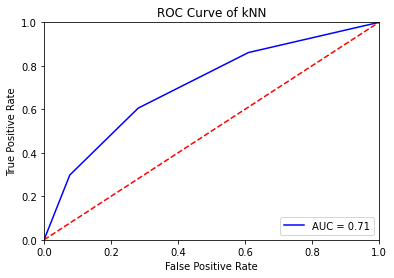

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6862434386451421

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      5626
           1       0.66      0.61      0.63      4471

    accuracy                           0.69     10097
   macro avg       0.68      0.68      0.68     10097
weighted avg       0.68      0.69      0.68     10097



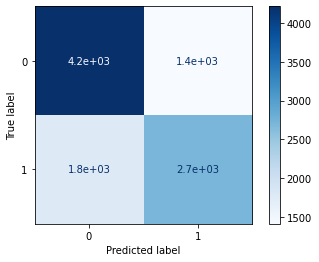

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

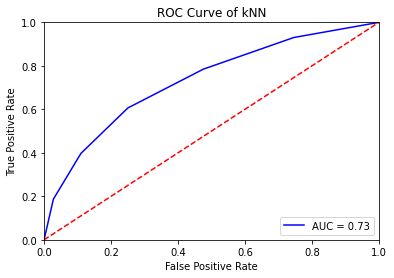

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

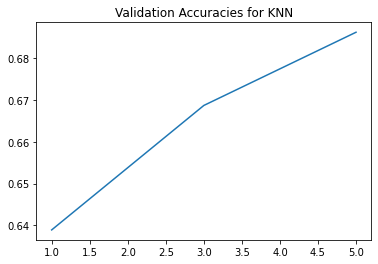

Best K Value :  5
Best Validation Accuracy :  0.6862434386451421


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 4.7**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.7 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7165494701396454

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80      6321
           1       0.70      0.42      0.53      3776

    accuracy                           0.72     10097
   macro avg       0.71      0.66      0.66     10097
weighted avg       0.71      0.72      0.70     10097



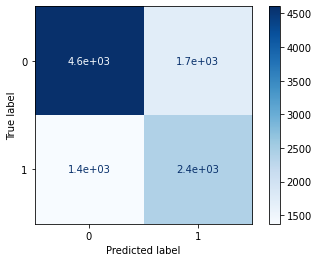

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

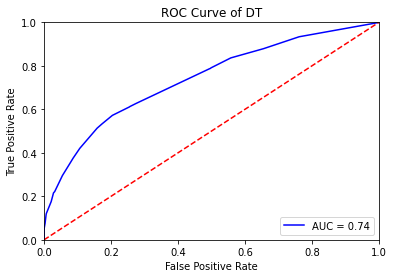

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7320986431613351

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80      6321
           1       0.69      0.51      0.59      3776

    accuracy                           0.73     10097
   macro avg       0.72      0.69      0.69     10097
weighted avg       0.73      0.73      0.72     10097



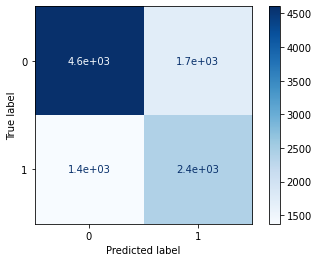

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

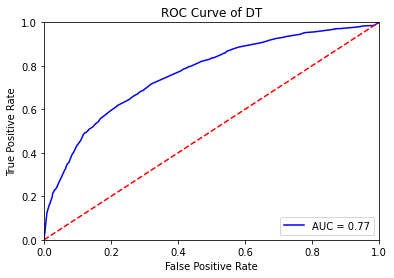

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7167475487768644

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78      6321
           1       0.64      0.54      0.59      3776

    accuracy                           0.72     10097
   macro avg       0.70      0.68      0.69     10097
weighted avg       0.71      0.72      0.71     10097



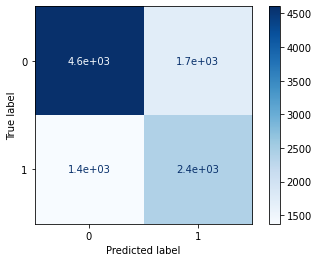

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

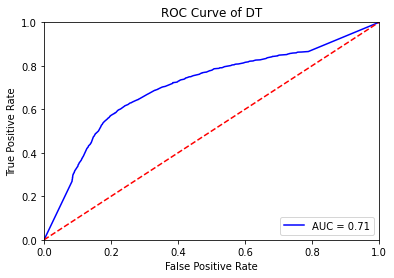

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

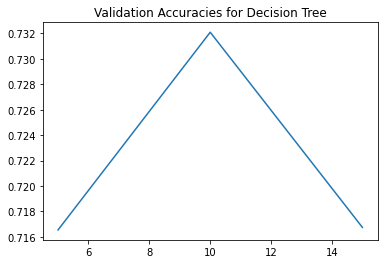

Best Depth :  10
Best Validation Accuracy :  0.7320986431613351


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6619788055858176

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6321
           1       0.55      0.55      0.55      3776

    accuracy                           0.66     10097
   macro avg       0.64      0.64      0.64     10097
weighted avg       0.66      0.66      0.66     10097



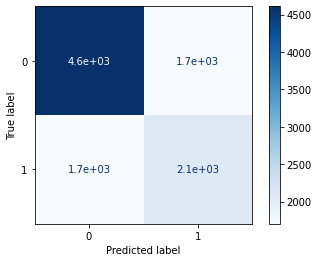

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

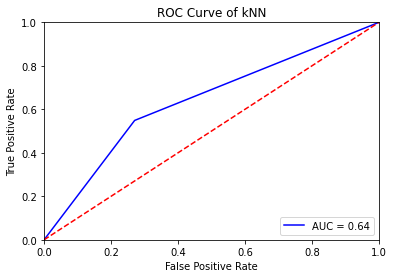

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.6940675448152916

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      6321
           1       0.60      0.54      0.57      3776

    accuracy                           0.69     10097
   macro avg       0.67      0.66      0.67     10097
weighted avg       0.69      0.69      0.69     10097



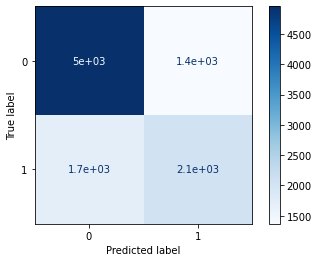

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

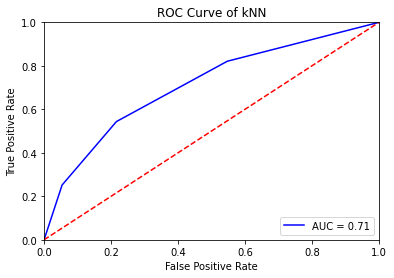

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7052589878181638

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77      6321
           1       0.62      0.53      0.57      3776

    accuracy                           0.71     10097
   macro avg       0.68      0.67      0.67     10097
weighted avg       0.70      0.71      0.70     10097



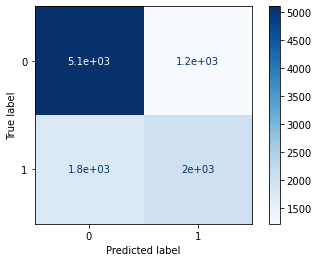

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

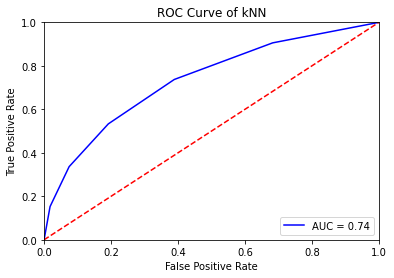

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

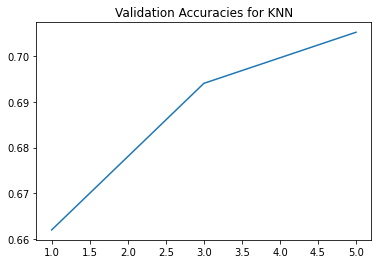

Best K Value :  5
Best Validation Accuracy :  0.7052589878181638


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 4.8**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.8 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7458651084480539

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83      6993
           1       0.65      0.37      0.47      3104

    accuracy                           0.75     10097
   macro avg       0.71      0.64      0.65     10097
weighted avg       0.73      0.75      0.72     10097



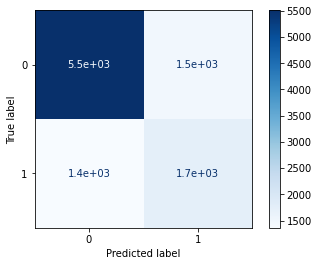

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

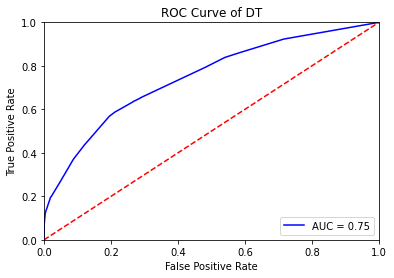

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7599286916906012

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6993
           1       0.66      0.45      0.53      3104

    accuracy                           0.76     10097
   macro avg       0.72      0.67      0.69     10097
weighted avg       0.75      0.76      0.74     10097



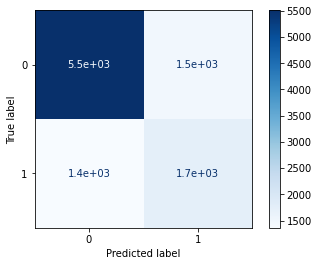

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

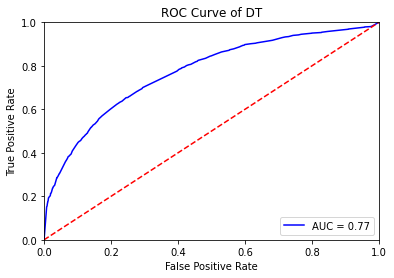

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.740021788650094

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      6993
           1       0.59      0.49      0.54      3104

    accuracy                           0.74     10097
   macro avg       0.69      0.67      0.68     10097
weighted avg       0.73      0.74      0.73     10097



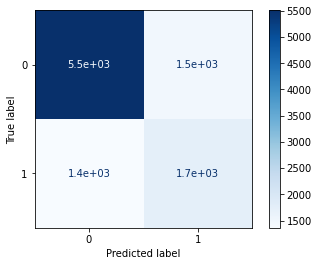

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

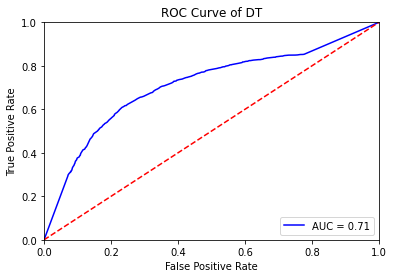

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

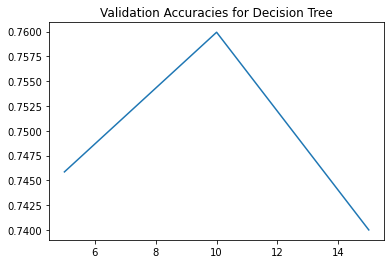

Best Depth :  10
Best Validation Accuracy :  0.7599286916906012


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.687233831831237

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6993
           1       0.49      0.49      0.49      3104

    accuracy                           0.69     10097
   macro avg       0.63      0.63      0.63     10097
weighted avg       0.69      0.69      0.69     10097



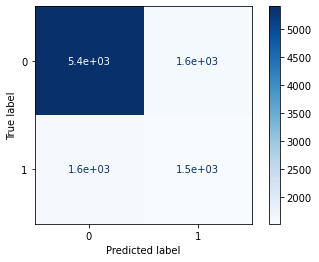

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

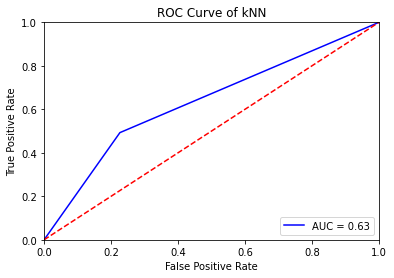

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7200158462909775

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80      6993
           1       0.55      0.46      0.50      3104

    accuracy                           0.72     10097
   macro avg       0.67      0.65      0.65     10097
weighted avg       0.71      0.72      0.71     10097



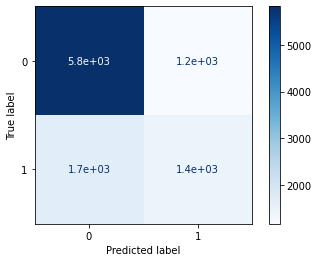

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

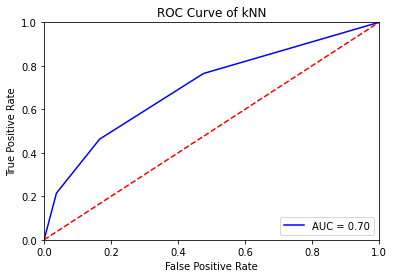

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7348717440824007

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      6993
           1       0.59      0.45      0.51      3104

    accuracy                           0.73     10097
   macro avg       0.68      0.66      0.66     10097
weighted avg       0.72      0.73      0.72     10097



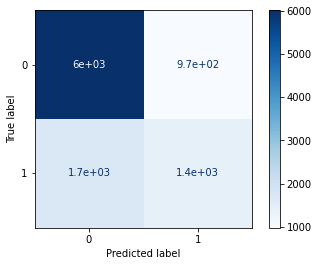

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

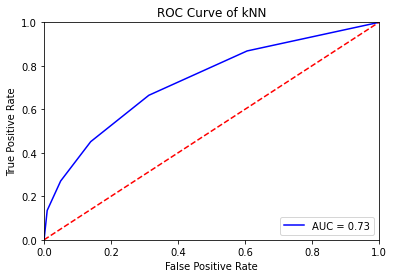

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

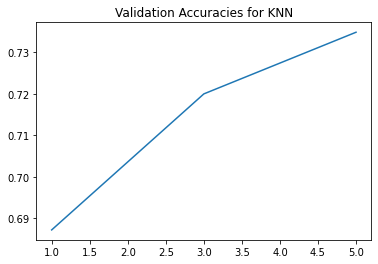

Best K Value :  5
Best Validation Accuracy :  0.7348717440824007


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 4.9**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4.9 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7916212736456373

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.88      7584
           1       0.75      0.24      0.37      2513

    accuracy                           0.79     10097
   macro avg       0.77      0.61      0.62     10097
weighted avg       0.78      0.79      0.75     10097



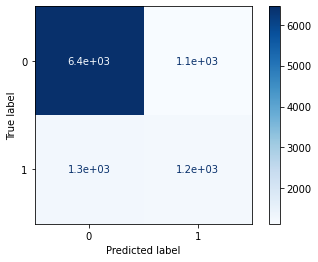

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

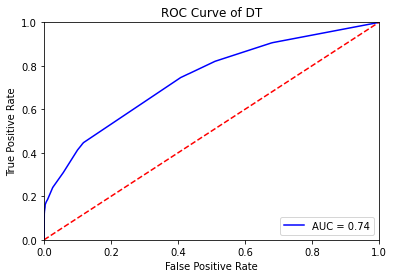

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.7916212736456373

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7584
           1       0.68      0.31      0.43      2513

    accuracy                           0.79     10097
   macro avg       0.74      0.63      0.65     10097
weighted avg       0.77      0.79      0.76     10097



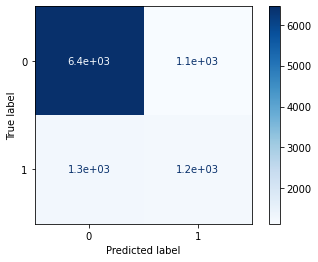

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

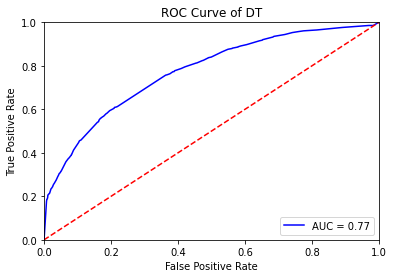

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.78528275725463

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      7584
           1       0.60      0.40      0.48      2513

    accuracy                           0.79     10097
   macro avg       0.71      0.66      0.67     10097
weighted avg       0.77      0.79      0.77     10097



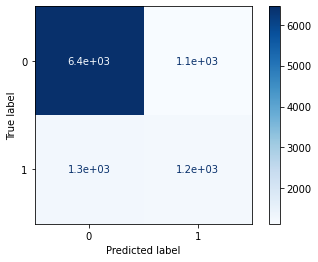

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

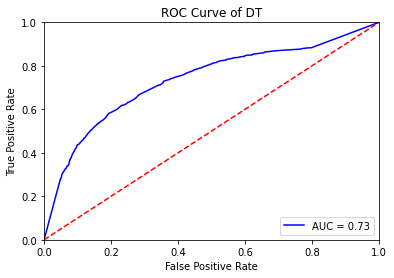

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

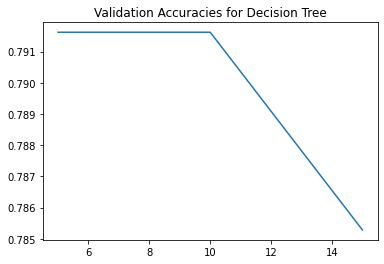

Best Depth :  5
Best Validation Accuracy :  0.7916212736456373


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.732296721798554

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7584
           1       0.46      0.46      0.46      2513

    accuracy                           0.73     10097
   macro avg       0.64      0.64      0.64     10097
weighted avg       0.73      0.73      0.73     10097



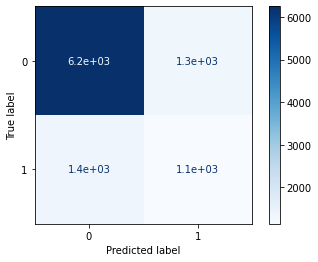

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

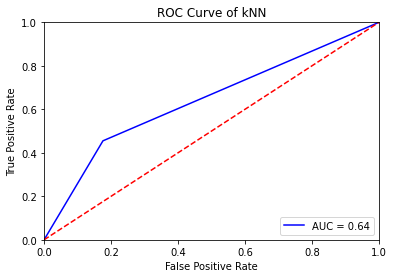

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7677527978607507

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      7584
           1       0.54      0.42      0.47      2513

    accuracy                           0.77     10097
   macro avg       0.68      0.65      0.66     10097
weighted avg       0.75      0.77      0.76     10097



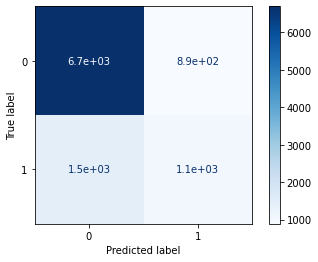

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

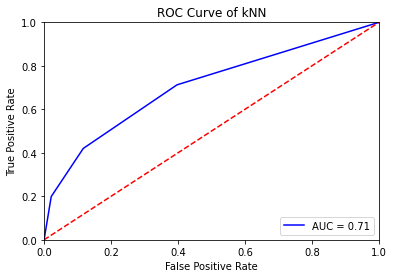

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7762701792611667

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      7584
           1       0.57      0.39      0.46      2513

    accuracy                           0.78     10097
   macro avg       0.70      0.65      0.66     10097
weighted avg       0.76      0.78      0.76     10097



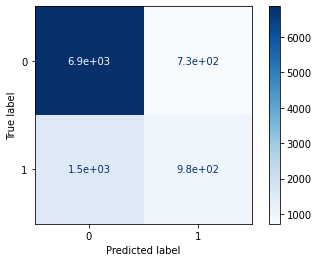

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

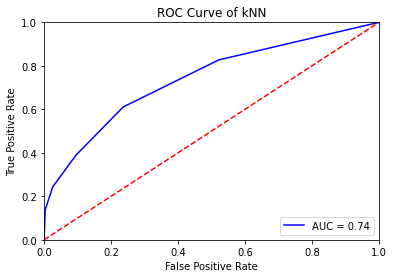

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

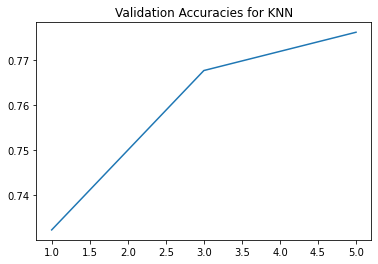

Best K Value :  5
Best Validation Accuracy :  0.7762701792611667


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Threshold 5**

In [ ]:
K = [1,3,5]
accuracies = []
D = [5,10,15]
dtaccuracies = []
copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 5 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT depth = 5

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.8420322868178667

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      8143
           1       0.87      0.22      0.35      1954

    accuracy                           0.84     10097
   macro avg       0.86      0.60      0.63     10097
weighted avg       0.85      0.84      0.80     10097



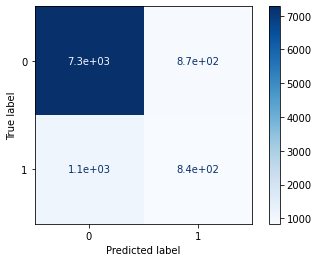

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

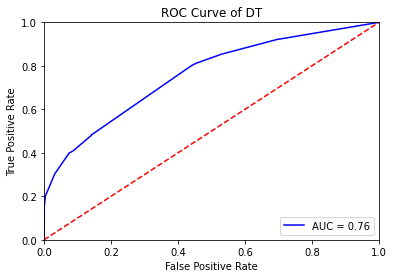

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 10

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.8427255620481331

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      8143
           1       0.76      0.27      0.40      1954

    accuracy                           0.84     10097
   macro avg       0.80      0.63      0.66     10097
weighted avg       0.83      0.84      0.81     10097



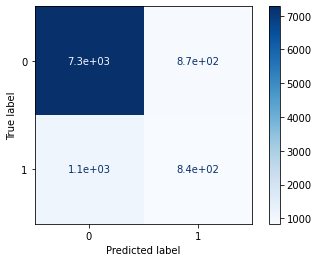

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

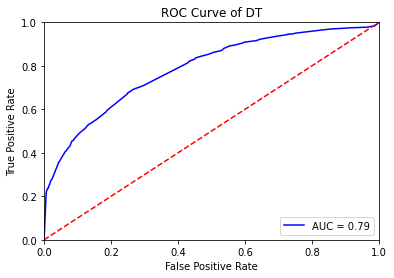

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

DT depth = 15

In [ ]:
dt = DecisionTreeClassifier(random_state=0,max_depth=15)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
dtaccuracies.append(acc)
acc

0.8287610181241953

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      8143
           1       0.60      0.35      0.44      1954

    accuracy                           0.83     10097
   macro avg       0.73      0.65      0.67     10097
weighted avg       0.81      0.83      0.81     10097



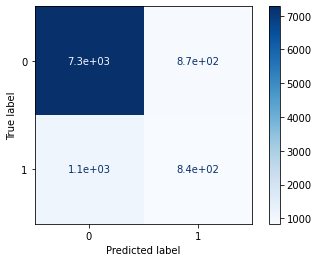

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

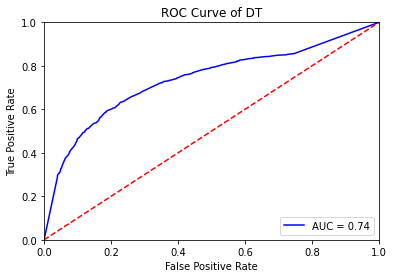

In [ ]:
y_scores = dt.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of DT')
plt.show()

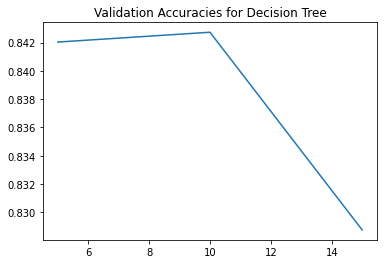

Best Depth :  10
Best Validation Accuracy :  0.8427255620481331


In [ ]:
plt.plot(D, dtaccuracies) 
plt.title('Validation Accuracies for Decision Tree') 
   
plt.show()

i = dtaccuracies.index(max(dtaccuracies))
print( "Best Depth : " ,D[i])
print( "Best Validation Accuracy : " ,max(dtaccuracies))

KNN n = 1

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.7839952461127068

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      8143
           1       0.44      0.43      0.44      1954

    accuracy                           0.78     10097
   macro avg       0.65      0.65      0.65     10097
weighted avg       0.78      0.78      0.78     10097



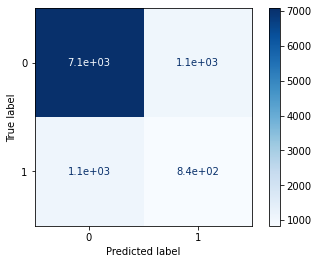

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

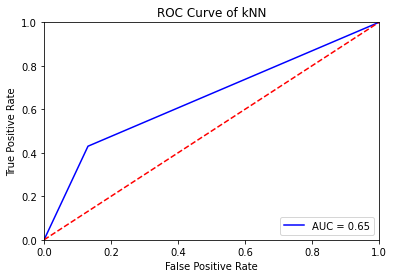

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n = 3

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.8185599683074181

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      8143
           1       0.54      0.38      0.45      1954

    accuracy                           0.82     10097
   macro avg       0.70      0.65      0.67     10097
weighted avg       0.80      0.82      0.81     10097



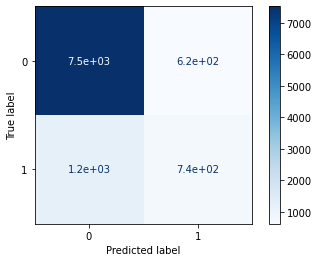

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

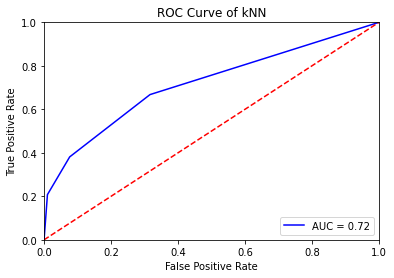

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

KNN n  = 5

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test,y_pred)
accuracies.append(acc)
acc

0.8291571753986332

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8143
           1       0.60      0.34      0.44      1954

    accuracy                           0.83     10097
   macro avg       0.73      0.64      0.67     10097
weighted avg       0.81      0.83      0.81     10097



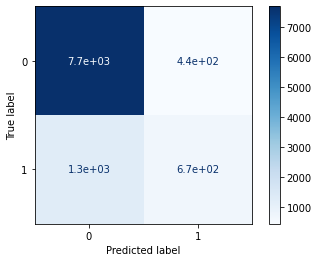

In [ ]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

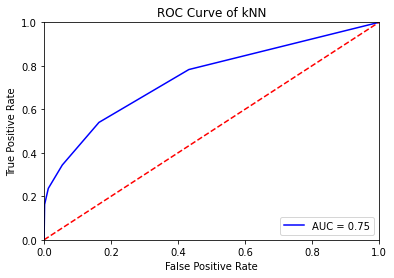

In [ ]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

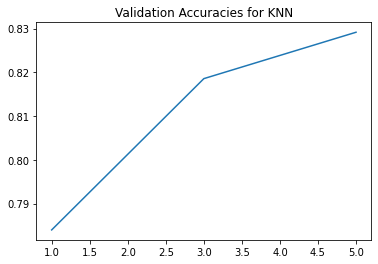

Best K Value :  5
Best Validation Accuracy :  0.8291571753986332


In [ ]:
plt.plot(K, accuracies) 
plt.title('Validation Accuracies for KNN') 
   
plt.show()

i = accuracies.index(max(accuracies))
print( "Best K Value : " ,K[i])
print( "Best Validation Accuracy : " ,max(accuracies))

**Best ROC Curve**

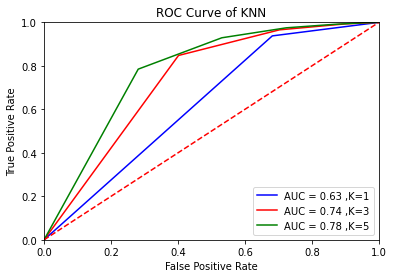

In [25]:
K = [1,3,5]

copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in K:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_scores = knn.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)

  fp_list_knn.append(fpr)
  tp_list_knn.append(tpr)
  auc_list_knn.append(roc_auc)

plt.title('ROC curves for KNN')

plt.plot(fp_list_knn[0], tp_list_knn[0], 'b', label = 'AUC = %0.2f ,K=1' % auc_list_knn[0])
plt.plot(fp_list_knn[1], tp_list_knn[1], 'r', label = 'AUC = %0.2f ,K=3' % auc_list_knn[1])
plt.plot(fp_list_knn[2], tp_list_knn[2], 'g', label = 'AUC = %0.2f ,K=5' % auc_list_knn[2])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of KNN')
plt.show()

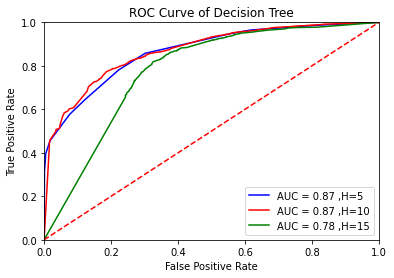

In [28]:
D = [5,10,15]

copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = np.array(copydf)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in D:
  dt = DecisionTreeClassifier(max_depth=i)
  dt.fit(X_train,y_train)
  y_scores = dt.predict_proba(X_test)
  fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
  roc_auc = auc(fpr, tpr)

  fp_list_dt.append(fpr)
  tp_list_dt.append(tpr)
  auc_list_dt.append(roc_auc)

plt.title('ROC curves for Decision Tree')

plt.plot(fp_list_dt[0], tp_list_dt[0], 'b', label = 'AUC = %0.2f ,H=5' % auc_list_dt[0])
plt.plot(fp_list_dt[1], tp_list_dt[1], 'r', label = 'AUC = %0.2f ,H=10' % auc_list_dt[1])
plt.plot(fp_list_dt[2], tp_list_dt[2], 'g', label = 'AUC = %0.2f ,H=15' % auc_list_dt[2])

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

**Feature Importance**

In [ ]:
df.columns

Index(['Year', 'Month', 'Day', 'Mw', 'Latitude', 'Longitude', 'Depth',
       'Reference'],
      dtype='object')

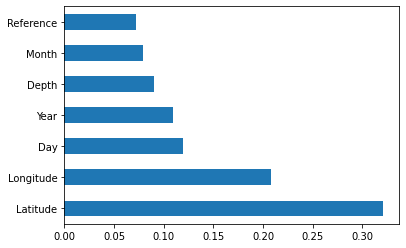

In [17]:
model =DecisionTreeClassifier()

copydf = df.copy()
y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)
X = copydf
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

1    46037
0     4445
Name: Labels, dtype: int64


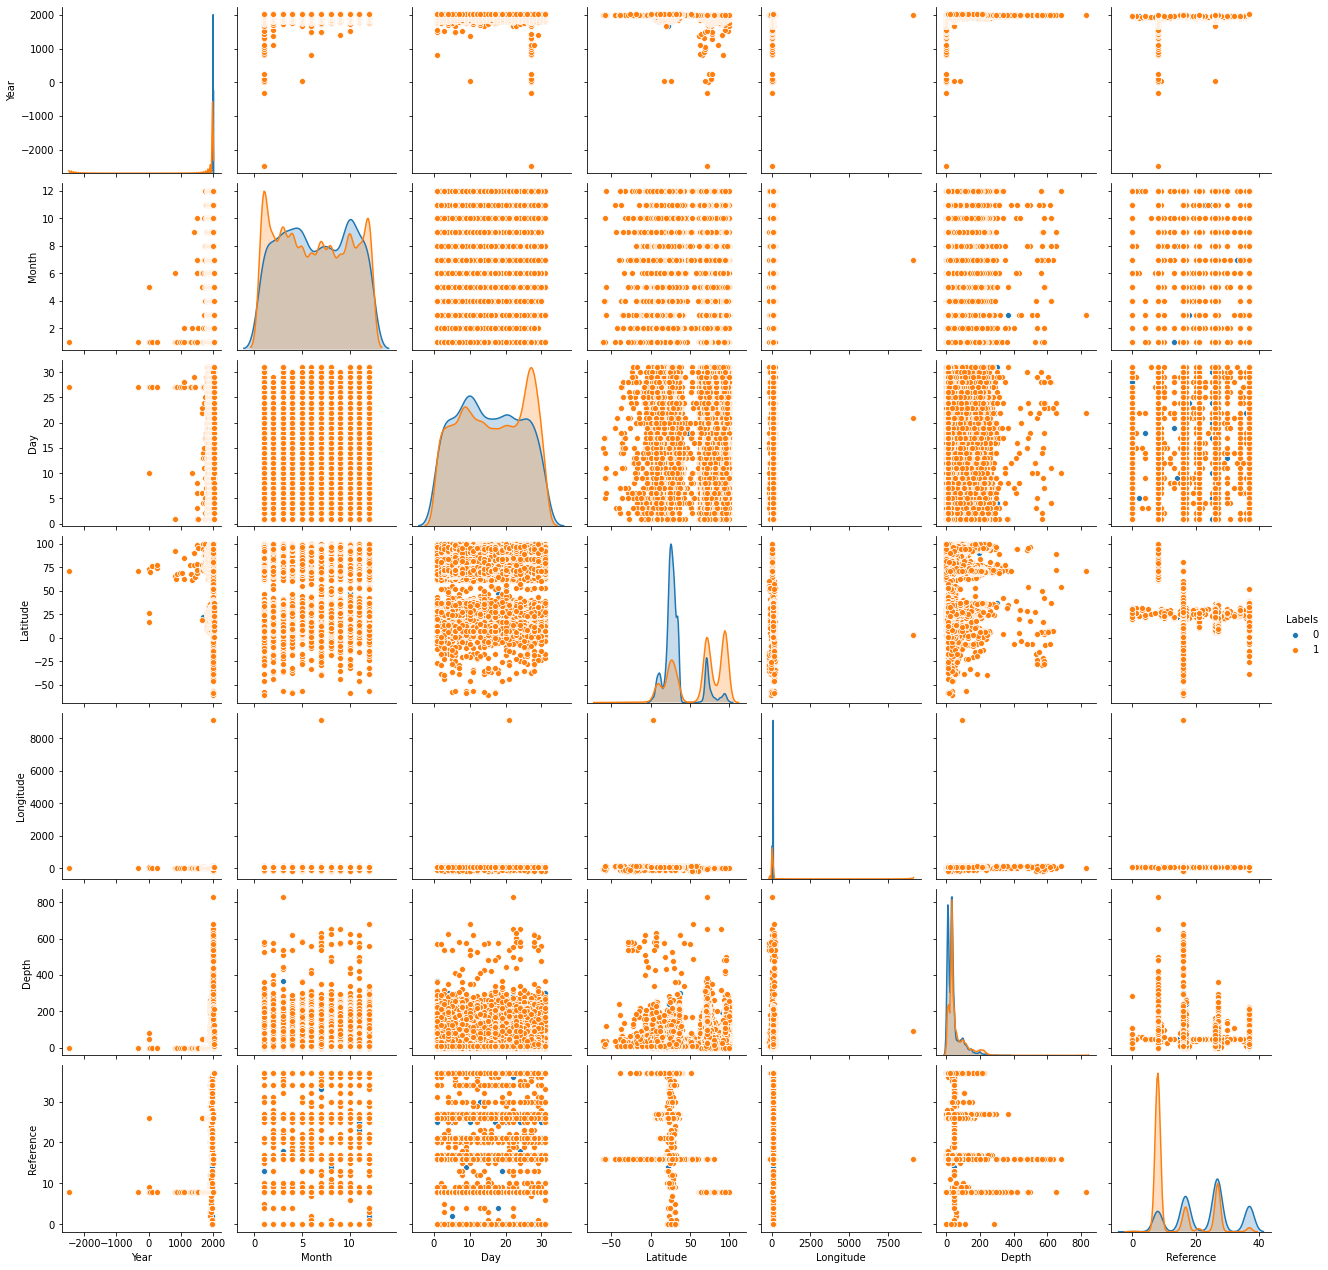

In [ ]:
threshold = 4
copydf = df.copy()
mag_class = []
mag = list(copydf['Mw'])
cols = [3]
copydf.drop(copydf.columns[cols],axis=1,inplace=True)
for i in mag:
    if i <threshold:
        mag_class.append(0)
    else:
        mag_class.append(1)

copydf['Labels'] = mag_class
le = LabelEncoder()
df["Reference"] = le.fit_transform(df["Reference"].values)
sub_data = copydf[["Year","Month","Day","Latitude","Longitude","Depth","Reference","Labels"]]

sns.pairplot(sub_data , vars=sub_data.columns[:-1], hue="Labels")
print(copydf['Labels'].value_counts())

**Improve Result**

KNN

In [33]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [34]:
copydf = df.copy()
y = y = np.array(copydf['Mw'].apply(lambda x: 0 if x < 4 else 1))
cols = [3]
copydf.drop(copydf.columns[cols],axis =1, inplace=True)
le = LabelEncoder()
copydf['Reference'] = le.fit_transform(copydf['Reference'].values)

mms = MinMaxScaler()
copydf[['Depth']] = mms.fit_transform(copydf[['Depth']])
period = []
prev = df.iloc[0,0]
for i in range(copydf.shape[0]):
  result = copydf.iloc[i,0]-prev
  period.append(result)
  prev = copydf.iloc[i,0]
copydf['Period'] = period
X = np.array(copydf)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_pred,y_test)

0.9161136971377637

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.30      0.39       889
           1       0.94      0.98      0.95      9208

    accuracy                           0.92     10097
   macro avg       0.74      0.64      0.67     10097
weighted avg       0.90      0.92      0.91     10097



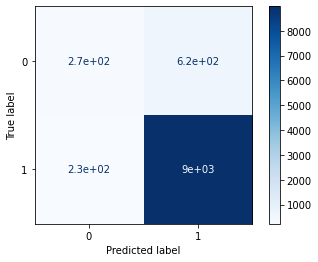

In [38]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

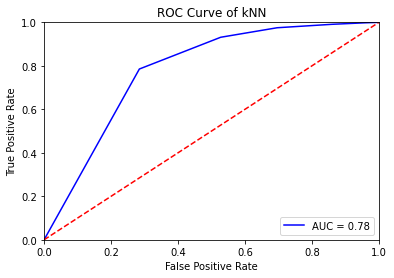

In [39]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

DT

In [40]:
dt = DecisionTreeClassifier(random_state=0,max_depth=10)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.9172031296424681

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.56      0.26      0.36       889
           1       0.93      0.98      0.96      9208

    accuracy                           0.92     10097
   macro avg       0.75      0.62      0.66     10097
weighted avg       0.90      0.92      0.90     10097



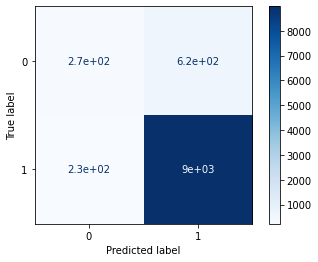

In [42]:
disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=[0,1],
                                 cmap=plt.cm.Blues)

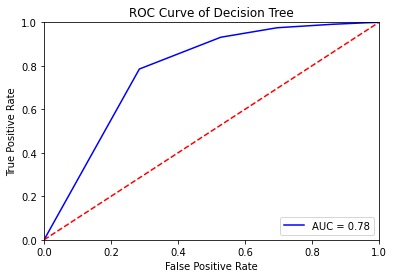

In [43]:
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

# plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()